Hunting Exoplanets In Space - Fast Fourier Transformation

---



1. Train dataset

   https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv

2. Test dataset

   https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv

In [136]:
# Load both the training and test datasets.
import numpy as np
import pandas as pd

exo_train_df = pd.read_csv('exoTrain.csv')
exo_test_df = pd.read_csv('exoTest.csv')

---

#### Data Normalisation

Normalise data using the mean normalisation method.

In [137]:
# # Function for mean normalisation.
def mean_normalise(series):
  norm_series = (series - series.mean()) / (series.max() - series.min())
  return norm_series

In [138]:
# Applying the 'mean_normalise()' function horizontally on the training DataFrame.
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)

In [139]:
# Inserting the 'LABEL' column to the 'norm_train_df' DataFrame.
norm_train_df.insert(loc=0, column='LABEL', value=exo_train_df['LABEL'])
norm_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590


In [140]:
# Applying the 'mean_normalise()' function on the testing DataFrame.
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)

In [141]:
# Inserting the 'LABEL' column to the 'norm_test_df' DataFrame.
norm_test_df.insert(loc=0, column='LABEL', value=exo_test_df['LABEL'])
norm_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,...,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,...,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,...,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,...,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,...,-0.006247,-0.016795,-0.001531,0.001095,-0.004439,-0.027127,-0.025421,-0.016852,-0.020089,0.002564


---

#### Transpose Of A DataFrame


In [142]:
# Transpose the 'exo_train_df' using the 'T' keyword.
exo_train_df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67


---

#### Fast Fourier Transformation

**What is Fourier Transformation?**

To understand the Fourier Transformation concept, let's go back to the line plots that we created in the previous classes. Recall the line plot for the `star_0` Pandas series. The graph has a wave-like pattern with periodic downward peaks. As the value on the $x-axis$ increases, the `FLUX` values on the $y-axis$ periodically increase and decrease.


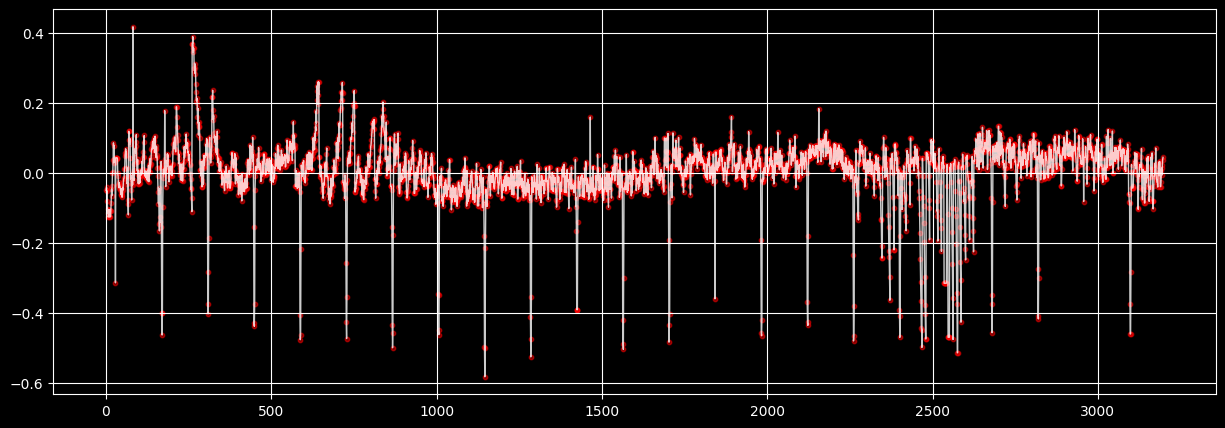

In [143]:

import matplotlib.pyplot as plt
yaxis = norm_train_df.iloc[1,1:]
xaxis = np.arange(1, 3198)

plt.figure(figsize = (15,5), dpi = 100)
plt.style.use('dark_background')
plt.scatter(xaxis, yaxis, alpha=0.5, label="Flux Data", color="red", s=10)
plt.plot(xaxis, yaxis, color="white", linewidth=1, label="Trend Line",alpha = 0.8)
plt.grid()
plt.show()


So there is a clear fluctuation in the `FLUX` values which drops,

- whenever a planet comes between its star and the Kepler telescope while orbiting the star and

- whenever the planet goes behind the star (as observed by Kepler telescope) while orbiting the star

These fluctuations occur after every fixed interval as you might have noticed. When the planet completes one revolution around the star, one cycle completes. This cycle repeats after a fixed time interval. E.g., Earth completes one revolution around the Sun in approximately 365.25 days so Earth's one cycle is 365.25 days long which repeats again and again.

The length of one cycle (in the unit of time) is called frequency. It is calculated as

$$f = \frac{1}{T}$$

where
$T$
is time in seconds. The SI unit of frequency is **Hertz** denoted as **Hz**.

So, the Earth's frequency is the reciprocal of
$365.25$
days, i.e.,

$$f_{\text{Earth}} = \frac{1}{365.25} $$

$$f_{\text{Earth}}= \frac{1}{365.25 \times 24 \times 60 \times 60} \space \text{Hz}$$

$[ \because 1 \space \text{day}  = 24 \times 60 \times 60 = 86400 \space \text{seconds} ]$

In a nutshell, we can compute the time-period of revolution (or cycle or frequency) of a planet around its star using the periodic variation in the flux values. The length of the period (or the length of one cycle) is the frequency of revolution of a planet around its star.

**Why do we need to apply Fourier Transformation?**

The Fourier transformation converts time-dependent data into frequency-dependent data.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-17/fft_example.png' width=600>


As you can see in the images above, first, we have a time-dependent data that is later converted into a frequency-dependent data. In the *Magnitude vs Frequency* graph, you can notice the peaks are located at the
$f = 0.2, 0.5, 3.55$
and
$3.8$
points on the frequency axis.

Similarly, we can get the frequencies of the planets revolving around its star. Our predict model (Random Forest Classifier) can capture these frequencies while learning from the training data. Thus, allowing the prediction model to make accurate predictions.

Let's go through one simple example of a very clear periodic variation.




In [144]:
1/86400

1.1574074074074073e-05

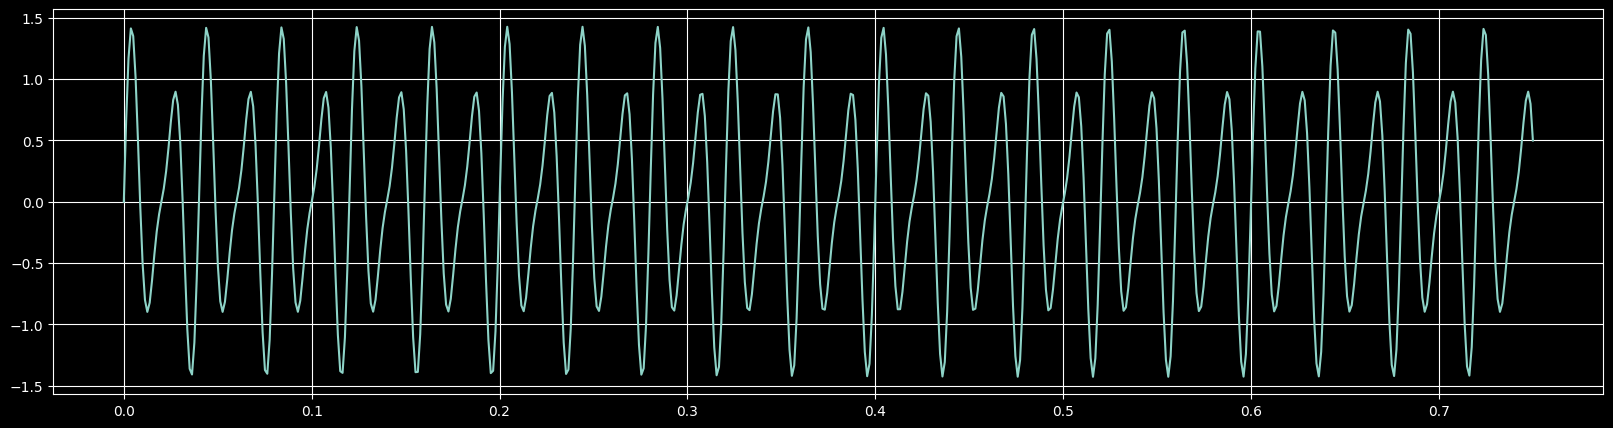

In [145]:

import numpy as np
import matplotlib.pyplot as plt

N = 600 # Number of sample points
T = 1.0 / 800.0 # sample spacing

t = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0 * np.pi * t) + 0.5 * np.sin(75.0 * 2.0 * np.pi * t)

plt.figure(figsize=(20, 5))
plt.plot(t, y)
plt.grid()
plt.show()

As you can see, the graph has a clear periodic variation. So, it must also have a frequency.


**The theory below is meant ONLY for the**
$12^{\text{th}}$
**and above standard student w.r.t. the NCERT Physics syllabus**

The above graph represents the sinusoidal wave having the equation
$$y = \sin((50 \times 2 \pi)t) + 0.5 \sin((75 \times 2 \pi)t)$$

where
$t$
is time.

So, the above sinusoidal wave is a linear combination of two sinusoidal waves having the equations

$$ y_1 = \sin((50 \times 2 \pi)t) \space \text{and} \\
y_2 = 0.5 \sin((75 \times 2\pi)t)
$$

A general equation of sinusoidal wave is given by
$$y = A \sin((2\pi f)t + \phi)$$

where
$A$
is amplitude,
$f$
is frequency and
$\phi$
is phase difference.

So, on comparing the two sinusoidal waves,
$y_1 \text{and} y_2$
with the general equation of a sinusoidal wave, we get

$$f_{1} = 50 \space \text{Hz} \space \text{and} \\
f_2= 75 \space \text{Hz}$$

Hence, the resulting sinusoidal wave has a combined frequency of 50 Hz and 75 Hz which should reflect in the frequency-dependent graph.


The code below applies Fourier transformation on the values stored in the `y` variable using the `fft.fft()` function which exists in the NumPy module. The transformed values are stored in the `yf` variable.

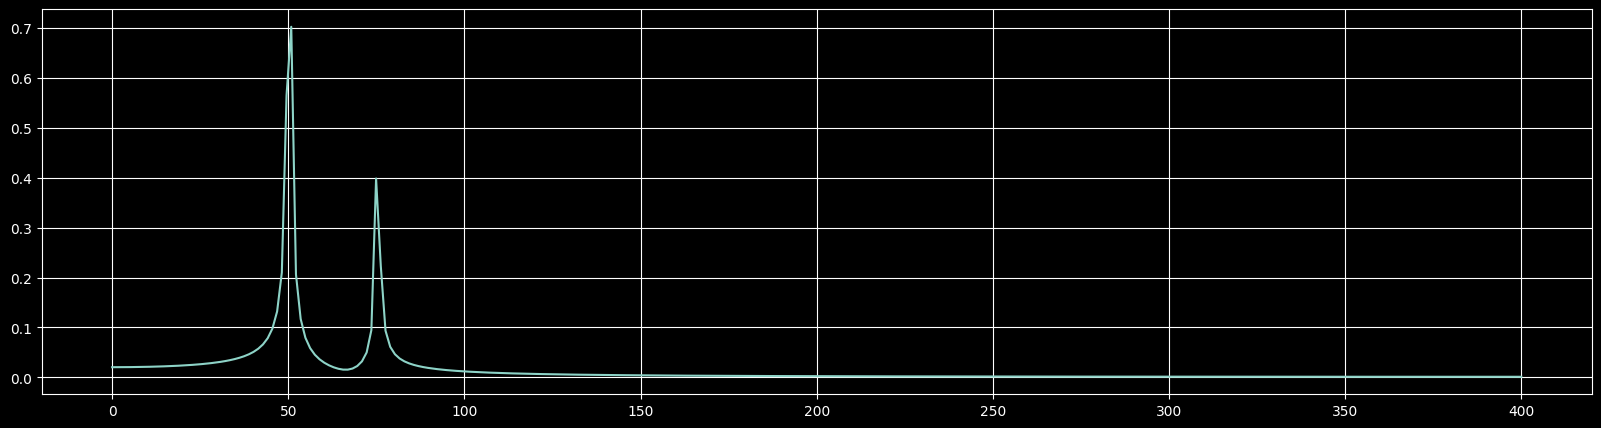

In [146]:
# Teacher Action: Run this code to make a line plot between the 'xf' and 'yf' values.
yf = np.fft.fft(y)
tf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=(20, 5))
plt.plot(tf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

As you can see, there are two peaks at the numbers `50` and `75` on the
$x-axis.$
These two values are frequencies. This means the object whose periodic motion described by the equation `y = np.sin(50.0 * 2.0 * np.pi * t) + 0.5 * np.sin(75.0 * 2.0 * np.pi * x)` oscillates with a combined frequency of `50` Hz and `75`Hz.


---

#### The `np.fft.fft()` 

Let's apply Fourier transformation on the first star, i.e., `star_0` using the `np.fft.fft()` function and then make its line plot.

**Note:** The acronym `fft` in the `fft.fft()` function stands for Fast Fourier Transformation. It's just the name of the algorithm which applies Fourier transformation (a mathematical concept).

In [147]:
import numpy as np

def fast_fourier_transform(star):
  fft_star = np.fft.fft(star, n=len(star))
  return np.abs(fft_star)

In [148]:

x_fft_train_T = norm_train_df.iloc[:, 1:].T.apply(fast_fourier_transform)
x_fft_train = x_fft_train_T.T
x_fft_train.head()




,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,7.154050e-15,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,...,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,2.437597e-15,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,...,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,5.370543e-15,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,...,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,3.781283e-15,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,...,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,5.073124e-15,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,...,4.923027,69.375686,36.451207,28.957862,116.738548,103.842855,148.627668,146.597215,51.382781,113.576655


In [149]:
freq = np.fft.fftfreq(len(exo_train_df.iloc[0, 1:]))
freq

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279], shape=(3197,))

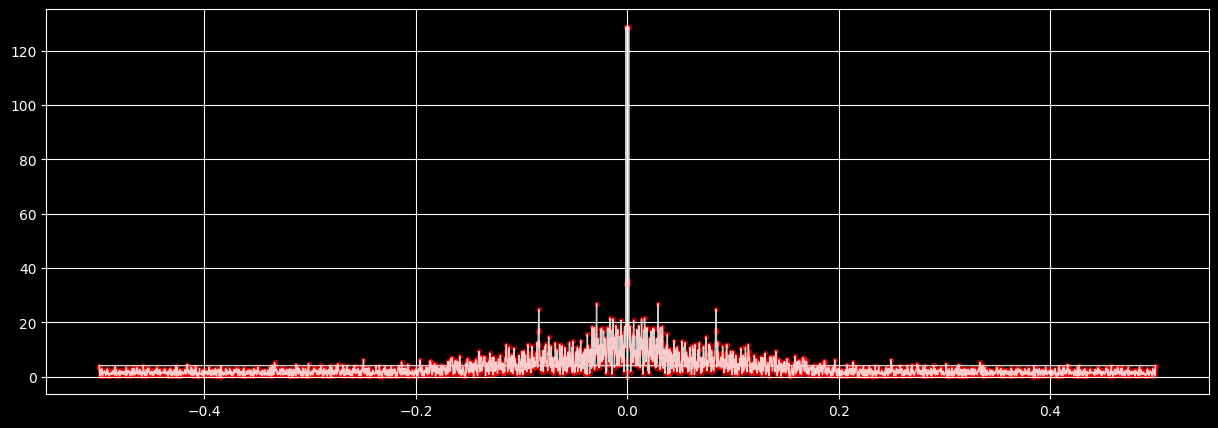

In [150]:

import matplotlib.pyplot as plt
yaxis = x_fft_train.iloc[0,:]
xaxis = freq

plt.figure(figsize = (15,5), dpi = 100)
plt.style.use('dark_background')
plt.scatter(xaxis, yaxis, alpha=0.5, label="Flux Data", color="red", s=10)
plt.plot(xaxis, yaxis, color="white", linewidth=1, label="",alpha = 0.8)
plt.grid()
plt.show()


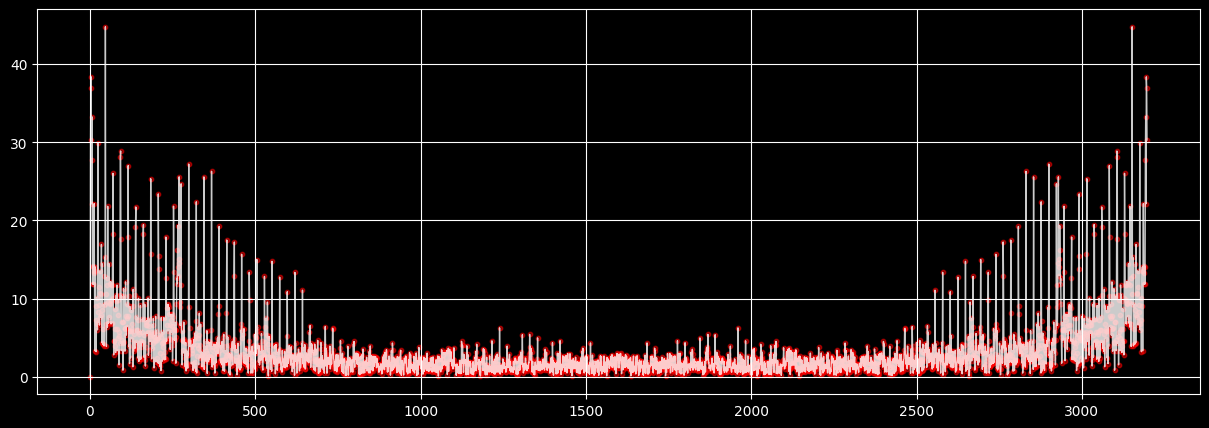

In [151]:

import matplotlib.pyplot as plt
yaxis = x_fft_train.iloc[1,:]
xaxis = np.arange(1,3198)

plt.figure(figsize = (15,5), dpi = 100)
plt.style.use('dark_background')
plt.scatter(xaxis, yaxis, alpha=0.5, label="Flux Data", color="red", s=10)
plt.plot(xaxis, yaxis, color="white", linewidth=1, label="Trend Line",alpha = 0.8)
plt.grid()
plt.show()


Note that the frequency array will be the same for all the stars because it depends on the length of the array/series. All the stars have the same array/series length.

Now, let's plot the Fourier transformed values with the frequency values for the `star_0` Pandas series.

The 5 tall peaks in the above graph:

1. At `-0.08` (approx)

2. At `-0.03` (approx)

3. At `-0.00`

4. At `0.03` (approx)

4. At `0.08` (approx)

Notice that the above plot is symmetric. So, either we can consider the left-half of the graph or the right-half. They both mean the same thing. Also, there is a huge spike close to `0`. It denotes that `star_0` has a frequency very close to `0`. If we plot the above graph for the first 10 values only, then we will be able to observe the peak very closely.

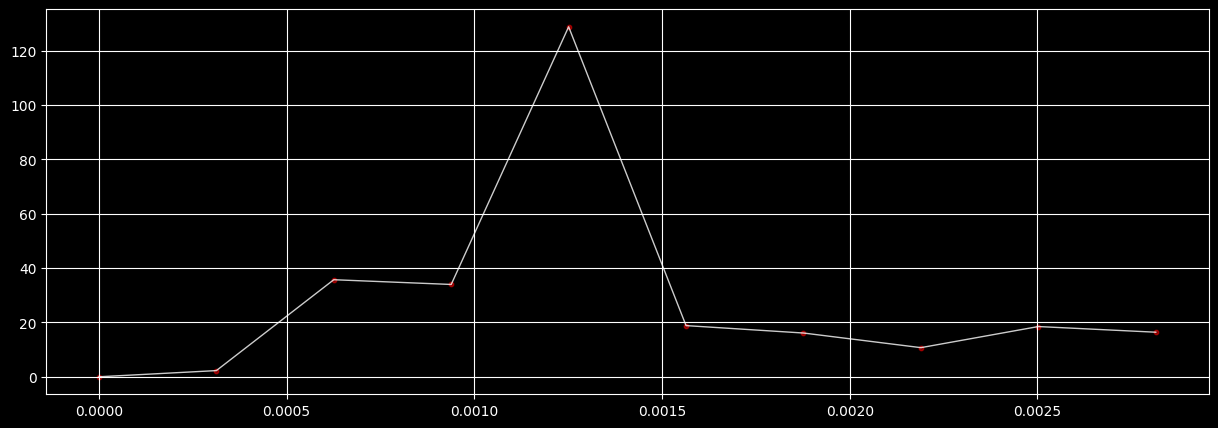

In [152]:

import matplotlib.pyplot as plt
yaxis = x_fft_train.iloc[0,:10]
xaxis = freq[0:10]

plt.figure(figsize = (15,5), dpi = 100)
plt.style.use('dark_background')
plt.scatter(xaxis, yaxis, alpha=0.5, label="Flux Data", color="red", s=10)
plt.plot(xaxis, yaxis, color="white", linewidth=1, label="",alpha = 0.8)
plt.grid()
plt.show()


As you can see, the peak lies at some point between `0.001` and `0.0015`, i.e. at `0.00125`.




Now, let's plot the line plots for the stars `34` to `40` to see observe the frequency variations. The stars in the rows `34` to `36` are the ones having a planet whereas the stars beyond the row `37` are the ones not having a planet.


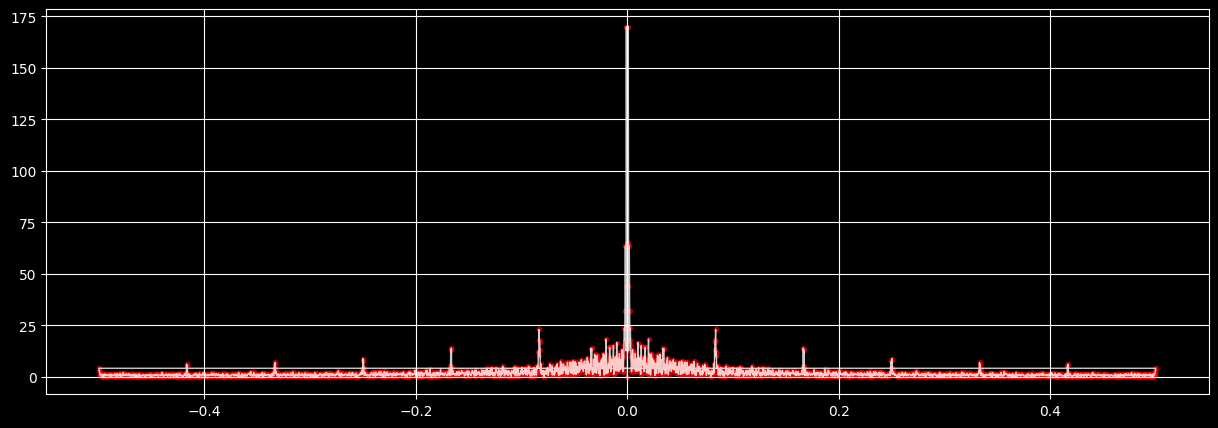

Star no.: 34 | LABEL: 2
----------------------------------------------------------------------------------------------------


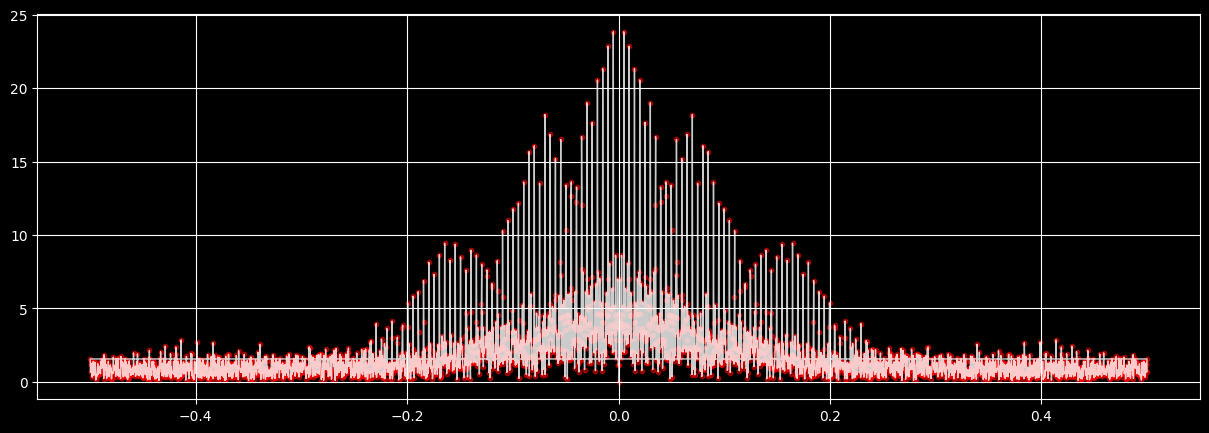

Star no.: 35 | LABEL: 2
----------------------------------------------------------------------------------------------------


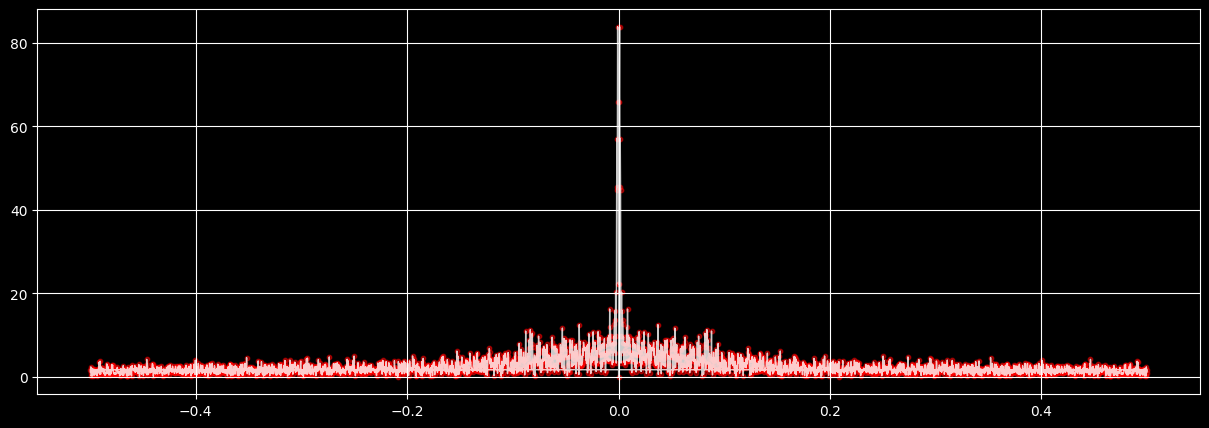

Star no.: 36 | LABEL: 2
----------------------------------------------------------------------------------------------------


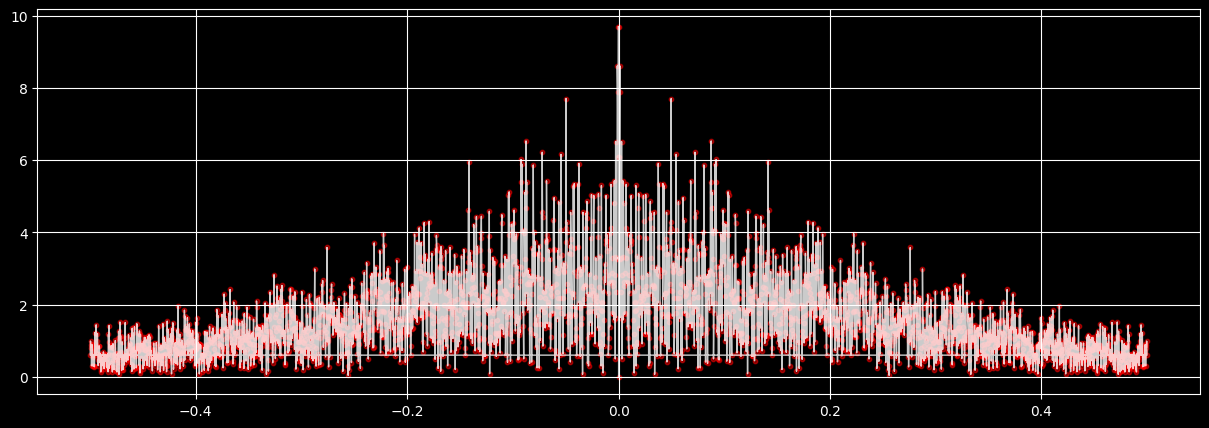

Star no.: 37 | LABEL: 1
----------------------------------------------------------------------------------------------------


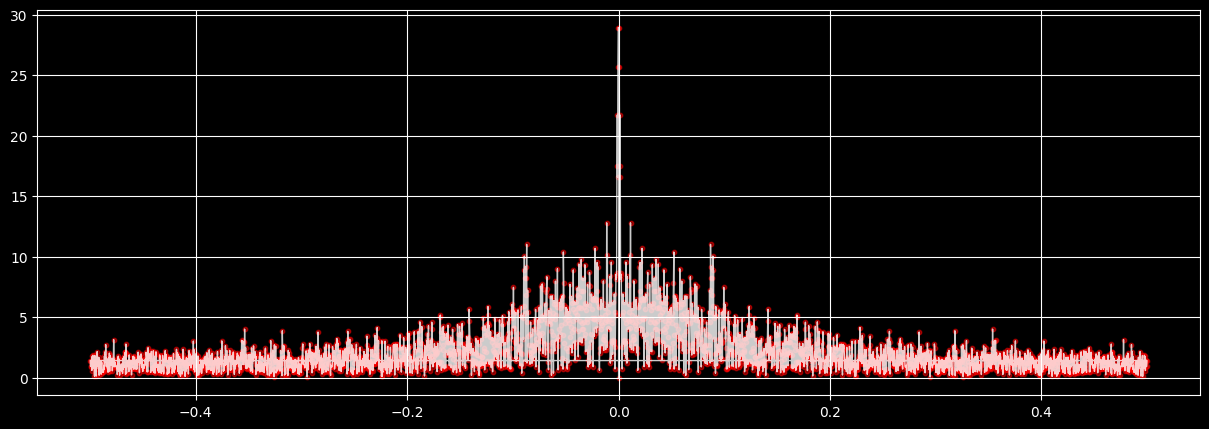

Star no.: 38 | LABEL: 1
----------------------------------------------------------------------------------------------------


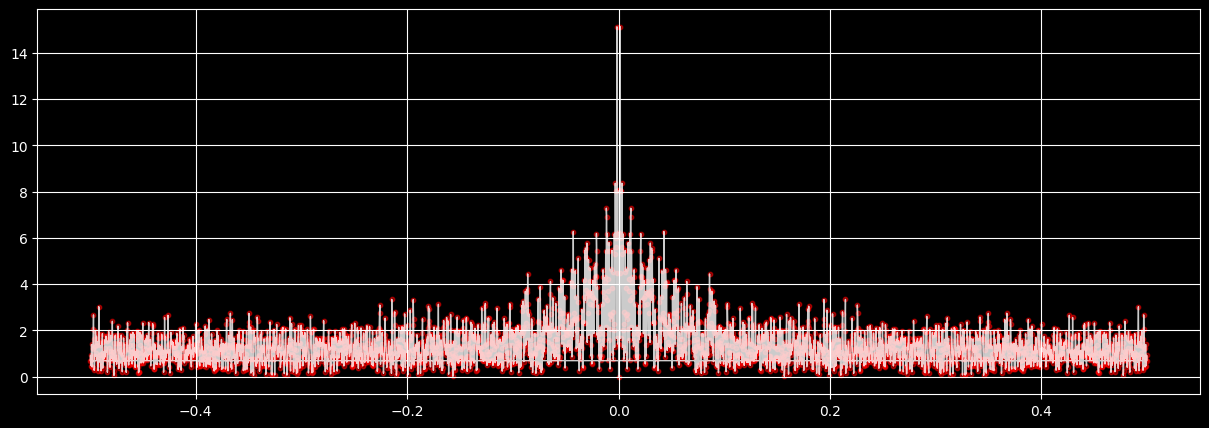

Star no.: 39 | LABEL: 1
----------------------------------------------------------------------------------------------------


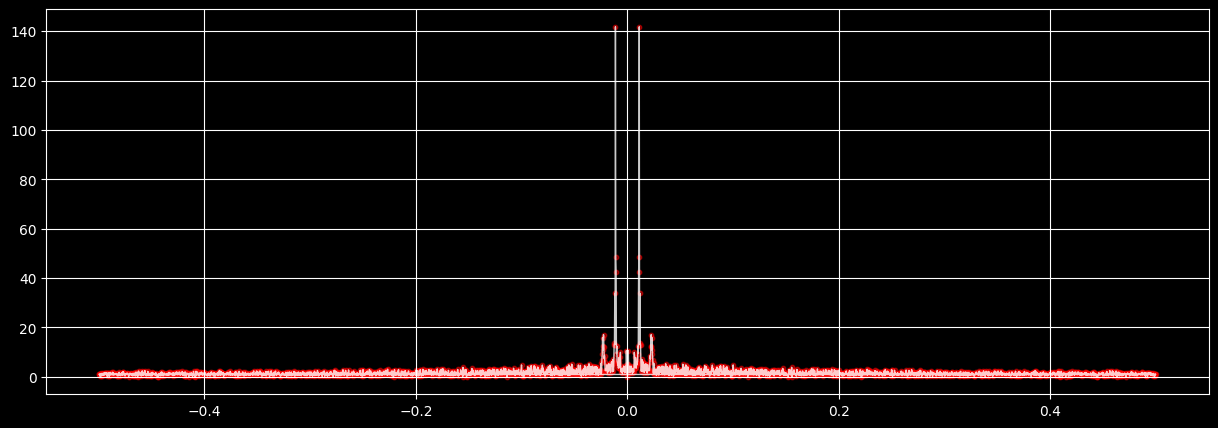

Star no.: 40 | LABEL: 1
----------------------------------------------------------------------------------------------------


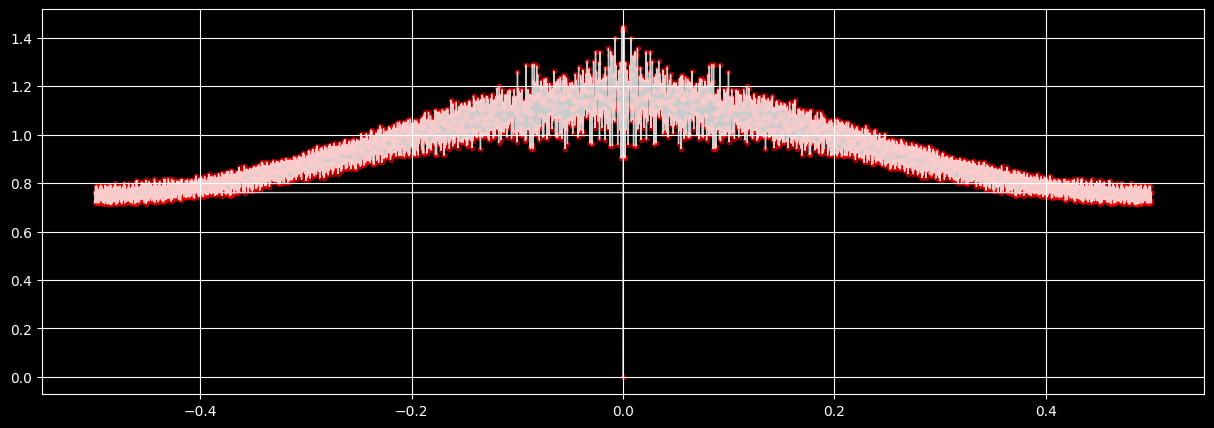

Star no.: 41 | LABEL: 1
----------------------------------------------------------------------------------------------------


In [153]:
import matplotlib.pyplot as plt

for i in range(34,42):
    yaxis = x_fft_train.iloc[i,:]
    xaxis = freq

    plt.figure(figsize = (15,5), dpi = 100)
    plt.style.use('dark_background')
    plt.scatter(xaxis, yaxis, alpha=0.5, label="Flux Data", color="red", s=10)
    plt.plot(xaxis, yaxis, color="white", linewidth=1, label="",alpha = 0.8)
    
    plt.grid()
    plt.show()
    
    print(f"Star no.: {i} | LABEL: {norm_train_df.iloc[i,0]}\n{"----"*25}")

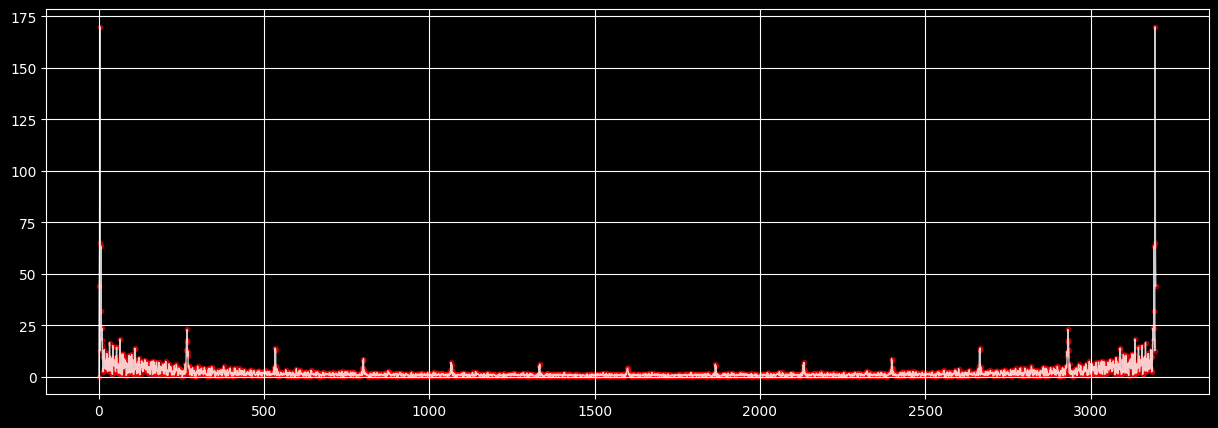

Star no.: 34 | LABEL: 2
----------------------------------------------------------------------------------------------------


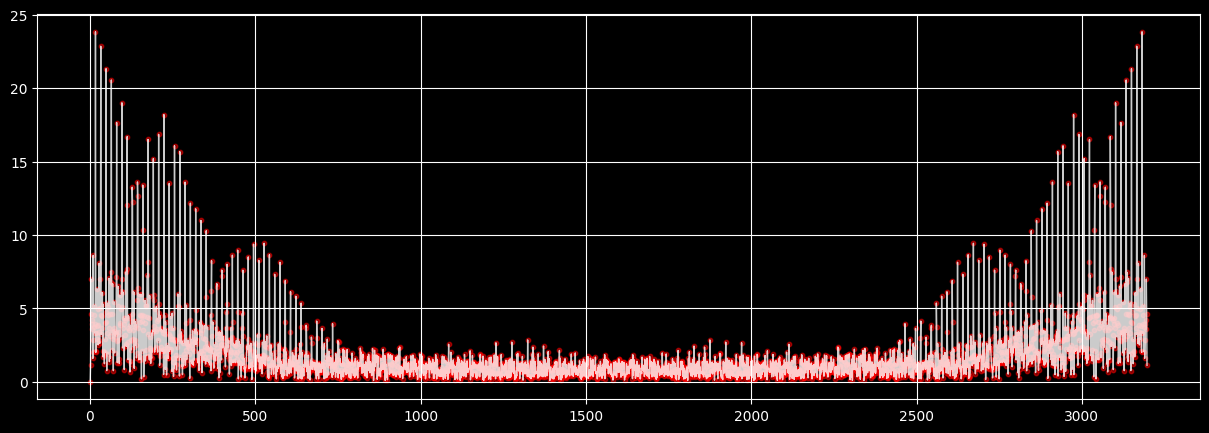

Star no.: 35 | LABEL: 2
----------------------------------------------------------------------------------------------------


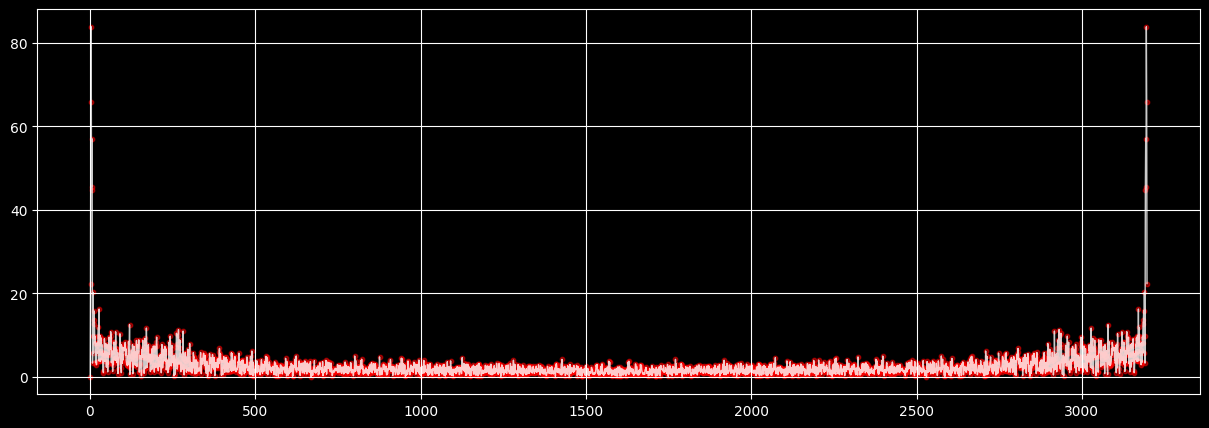

Star no.: 36 | LABEL: 2
----------------------------------------------------------------------------------------------------


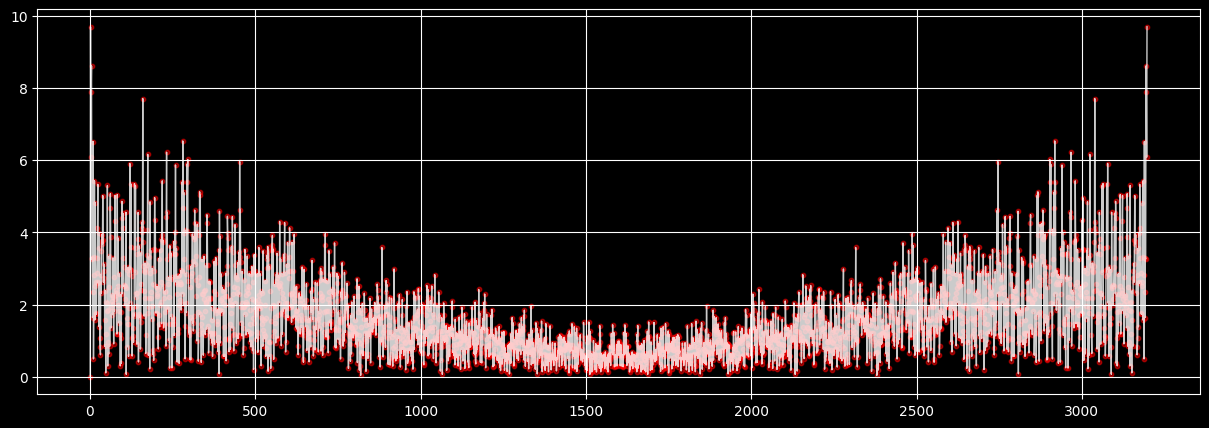

Star no.: 37 | LABEL: 1
----------------------------------------------------------------------------------------------------


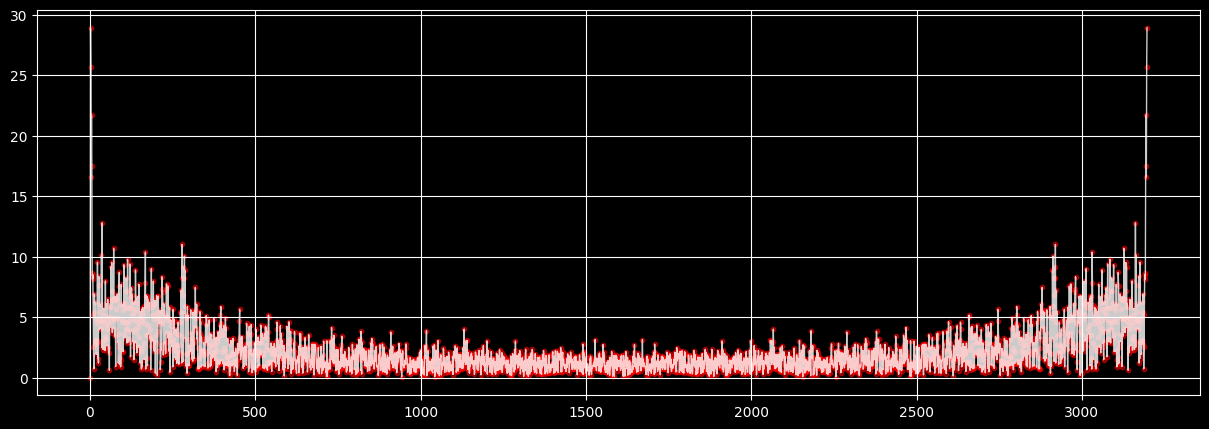

Star no.: 38 | LABEL: 1
----------------------------------------------------------------------------------------------------


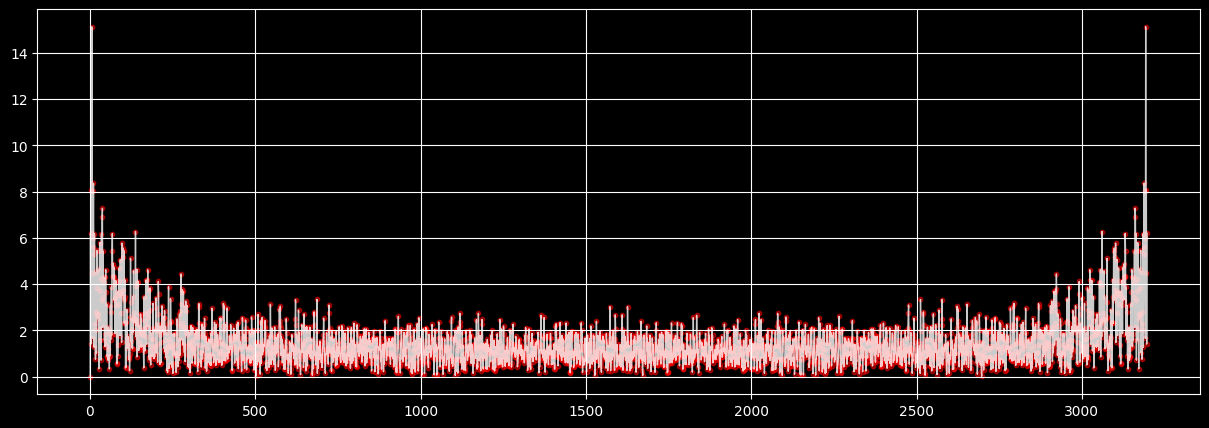

Star no.: 39 | LABEL: 1
----------------------------------------------------------------------------------------------------


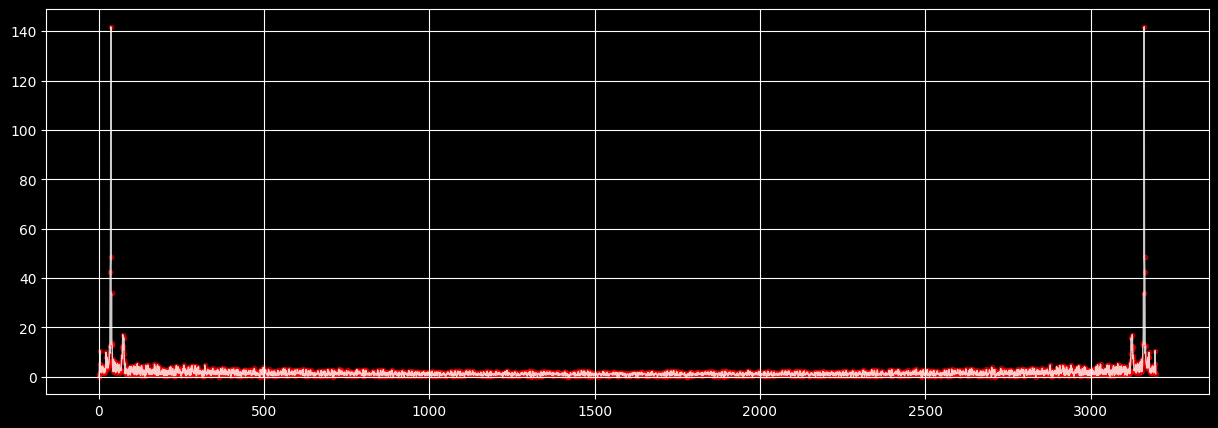

Star no.: 40 | LABEL: 1
----------------------------------------------------------------------------------------------------


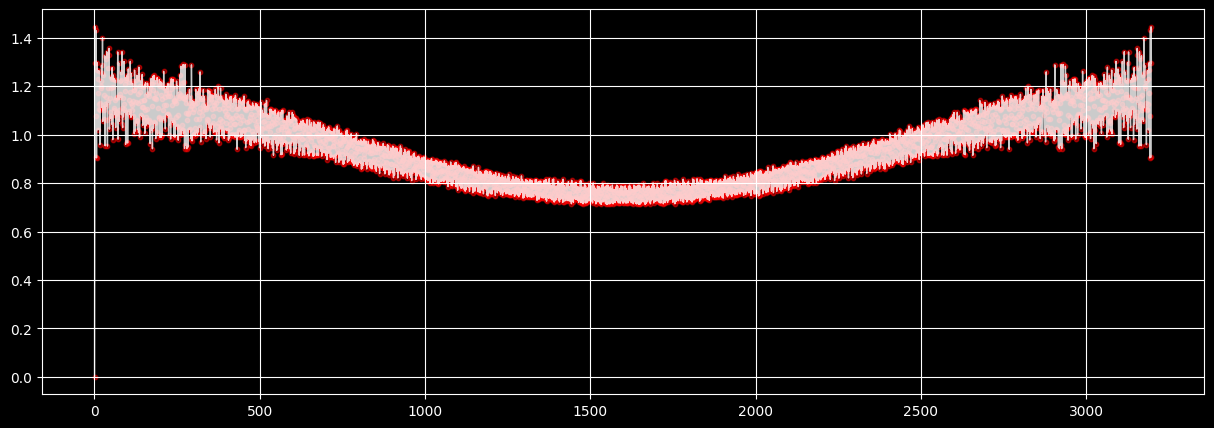

Star no.: 41 | LABEL: 1
----------------------------------------------------------------------------------------------------


In [154]:
import matplotlib.pyplot as plt

for i in range(34,42):
    yaxis = x_fft_train.iloc[i,:]
    xaxis = np.arange(1,3198)

    plt.figure(figsize = (15,5), dpi = 100)
    plt.style.use('dark_background')
    plt.scatter(xaxis, yaxis, alpha=0.5, label="Flux Data", color="red", s=10)
    plt.plot(xaxis, yaxis, color="white", linewidth=1, label="",alpha = 0.8)
    
    plt.grid()
    plt.show()
    
    print(f"Star no.: {i} | LABEL: {norm_train_df.iloc[i,0]}\n{"----"*25}")

The prediction model later, when deployed, should look for the different frequency pattern for different stars. Based on these patterns, it should classify whether a star has a planet or not.

Now, we will apply the `fast_fourier_transform()` function on the `norm_test_df` `FLUX` values only.

Now, we create the line plots for the stars in the rows `3 to 7`  in the transformed test DataFrame. Also, label the $x-axis$ with the row number.

In [155]:
x_fft_test_T = norm_test_df.iloc[:,1:].T.apply(fast_fourier_transform)
x_fft_test = x_fft_test_T.T
x_fft_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1.053250e-15,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,...,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,2.742049e-15,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,...,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,1.331620e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,...,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,2.352520e-15,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,...,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,5.845564e-15,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,...,5.167375,8.501530,14.800046,30.233859,17.985758,39.681676,27.841397,12.808132,11.941614,7.138386


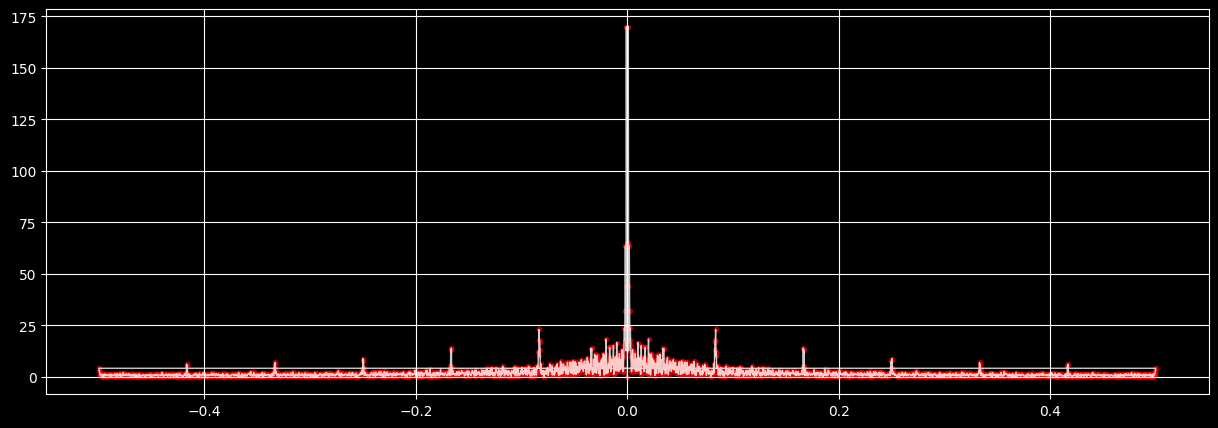

Star no.: 34 | LABEL: 2
----------------------------------------------------------------------------------------------------


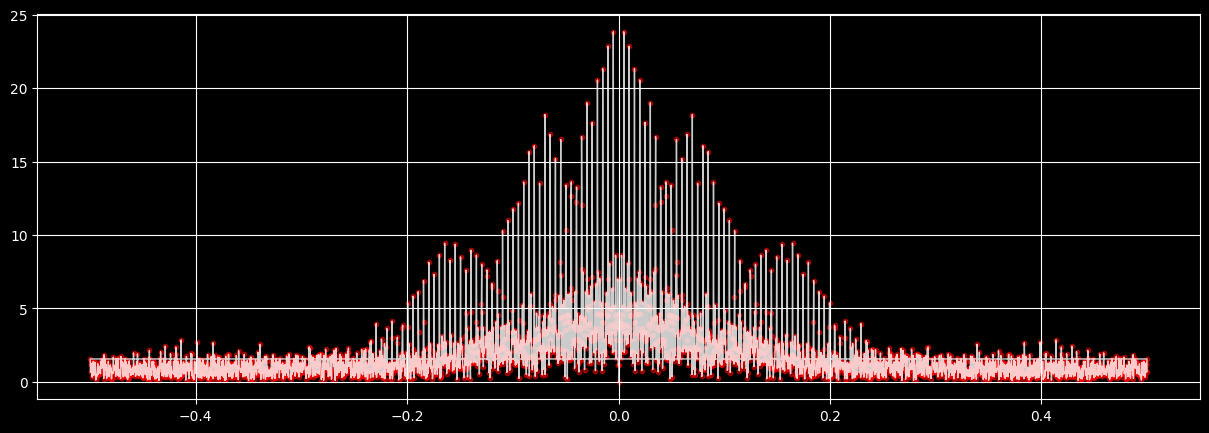

Star no.: 35 | LABEL: 2
----------------------------------------------------------------------------------------------------


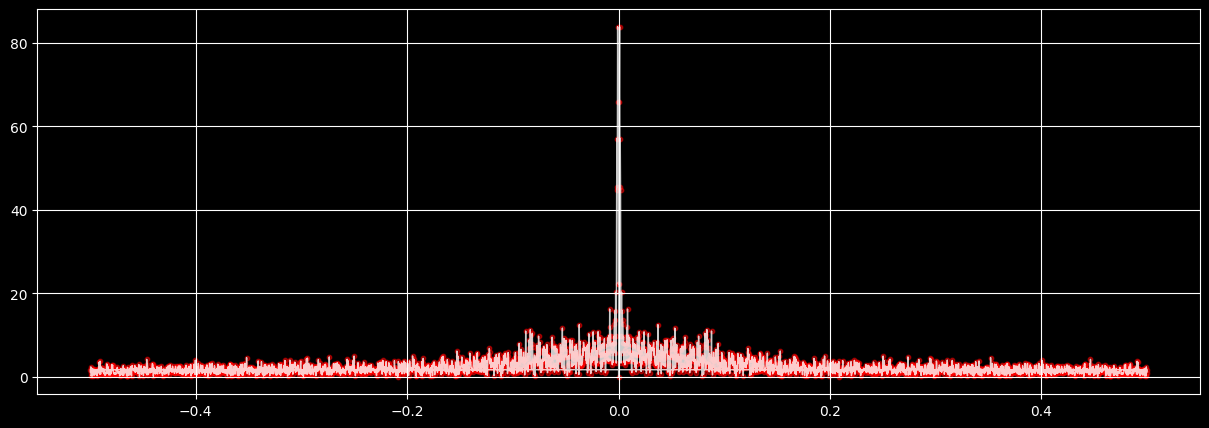

Star no.: 36 | LABEL: 2
----------------------------------------------------------------------------------------------------


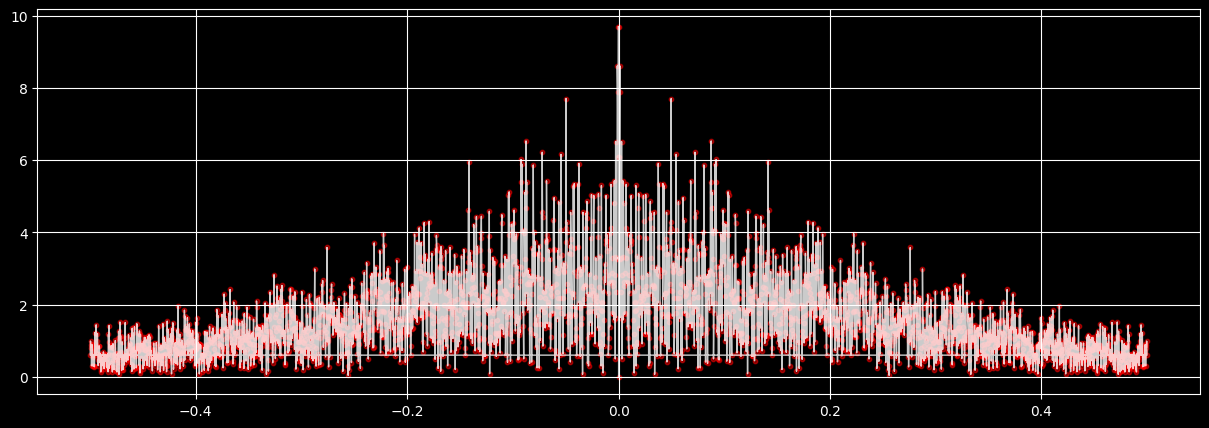

Star no.: 37 | LABEL: 1
----------------------------------------------------------------------------------------------------


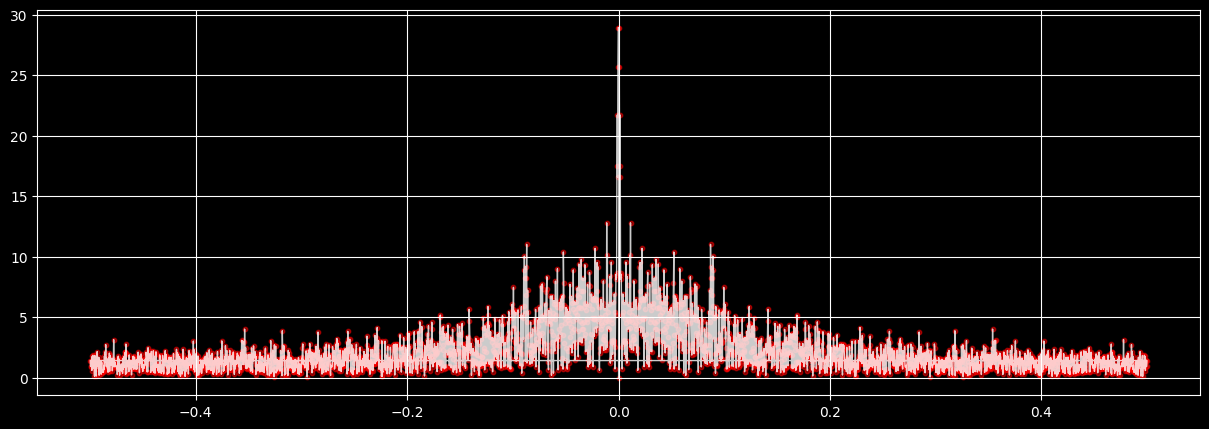

Star no.: 38 | LABEL: 1
----------------------------------------------------------------------------------------------------


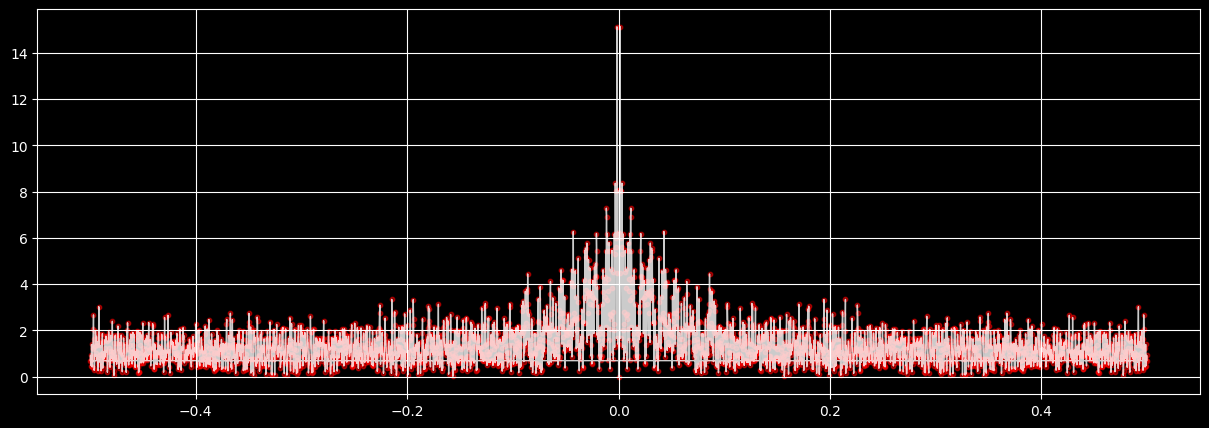

Star no.: 39 | LABEL: 1
----------------------------------------------------------------------------------------------------


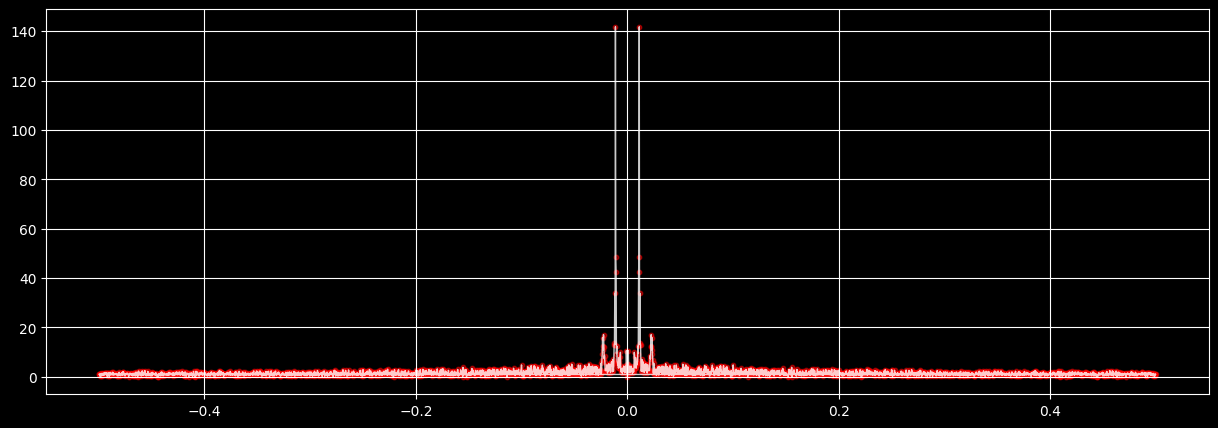

Star no.: 40 | LABEL: 1
----------------------------------------------------------------------------------------------------


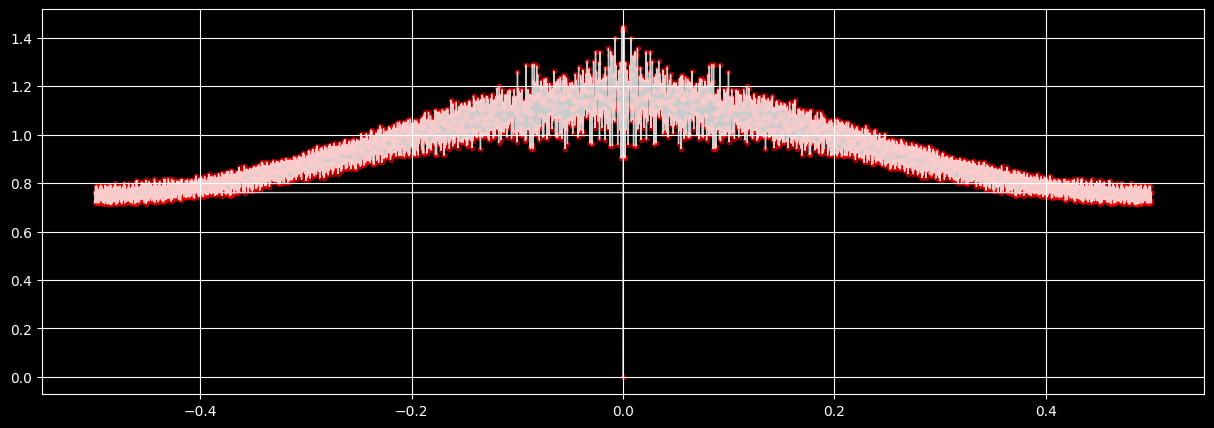

Star no.: 41 | LABEL: 1
----------------------------------------------------------------------------------------------------


In [156]:
import matplotlib.pyplot as plt

for i in range(34,42):
    yaxis = x_fft_train.iloc[i,:]
    xaxis = freq

    plt.figure(figsize = (15,5), dpi = 100)
    plt.style.use('dark_background')
    plt.scatter(xaxis, yaxis, alpha=0.5, label="Flux Data", color="red", s=10)
    plt.plot(xaxis, yaxis, color="white", linewidth=1, label="",alpha = 0.8)
    
    plt.grid()
    plt.show()
    
    print(f"Star no.: {i} | LABEL: {norm_train_df.iloc[i,0]}\n{"----"*25}")


Now that we have applied Fourier transformation, our prediction model should be able to recognise the different frequency patterns for different stars and hopefully should be able to classify the stars correctly as required.

---

Now Let's try deploying the models for the transformed values.

In [157]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [158]:
xtrain = x_fft_train
ytrain = norm_train_df.iloc[:,0]
xtest = x_fft_test
ytest = norm_test_df.iloc[:,0]

In [159]:
rfclf = RandomForestClassifier(n_estimators=150,n_jobs=-1)

rfclf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=150, n_jobs=-1)

In [160]:
rfclf.score(xtrain,ytrain)

1.0

In [161]:
ypred = rfclf.predict((xtest))
print(ypred)
print("___"*90)

accuracy = accuracy_score(ytest,ypred)
print(f"Model Accuracy: {accuracy*100:4f} %")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [162]:
confusion_matrix(ytest,ypred)

array([[565,   0],
       [  5,   0]])

##### Let's try XGboost

In [163]:
import xgboost as xg

md = xg.XGBClassifier()
md.fit(xtrain,ytrain-1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [164]:
y_pred = md.predict(xtest)
y_pred = pd.Series(y_pred) +1
print(y_pred.value_counts())

1    568
2      2
Name: count, dtype: int64


In [165]:
print(np.array(y_pred))

[2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [166]:
print(f"The Confusion Matrix:\n{confusion_matrix(ytest,y_pred)}")
print("-----"*20)

#print(f"{}")

The Confusion Matrix:
[[565   0]
 [  3   2]]
----------------------------------------------------------------------------------------------------


##### The Confusion Matrix:

||Predicted Class `1` (`y_predicted`)|Predicted Class `2` (`y_predicted`)|
|-|-|-|
|Actual Class `1` (`y_test`)|565 (TN)|0 (FP)|
|Actual Class `2` (`y_test`)|3 (FN)|2 (TP)|

In [167]:
print(f"Precision: (TP / (TP + FP)) = {2 / (2 + 0)}")
print(f"Recall: (TP / (TP + FN)) = {2 / (2 + 3)}")
print(f"F1 Score: 2 * (Precision * Recall) / (Precision + Recall) = {2 * ((2 / (2 + 0)) * (2 / (2 + 3))) / ((2 / (2 + 0)) + (2 / (2 + 3)))}")


Precision: (TP / (TP + FP)) = 1.0
Recall: (TP / (TP + FN)) = 0.4
F1 Score: 2 * (Precision * Recall) / (Precision + Recall) = 0.5714285714285715


In [168]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       1.00      0.40      0.57         5

    accuracy                           0.99       570
   macro avg       1.00      0.70      0.78       570
weighted avg       0.99      0.99      0.99       570



So here we can conclude that after applying:

1. Data Normalisation (mean normilization)

2. Fast Fourier Transformation

Our model is able to predict the stars having the planets.
